# Практика 9

### Задание 1

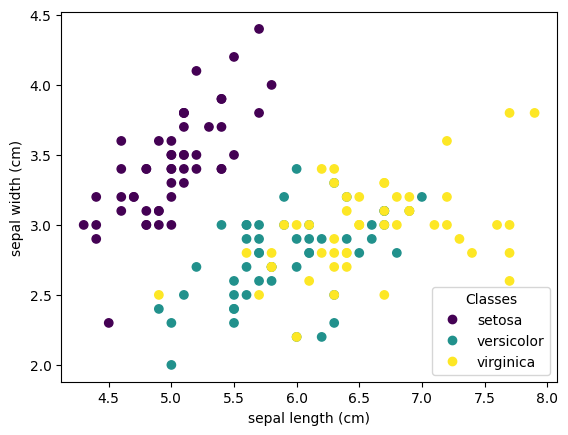

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Задание 2

#### Алгоритмы классификации

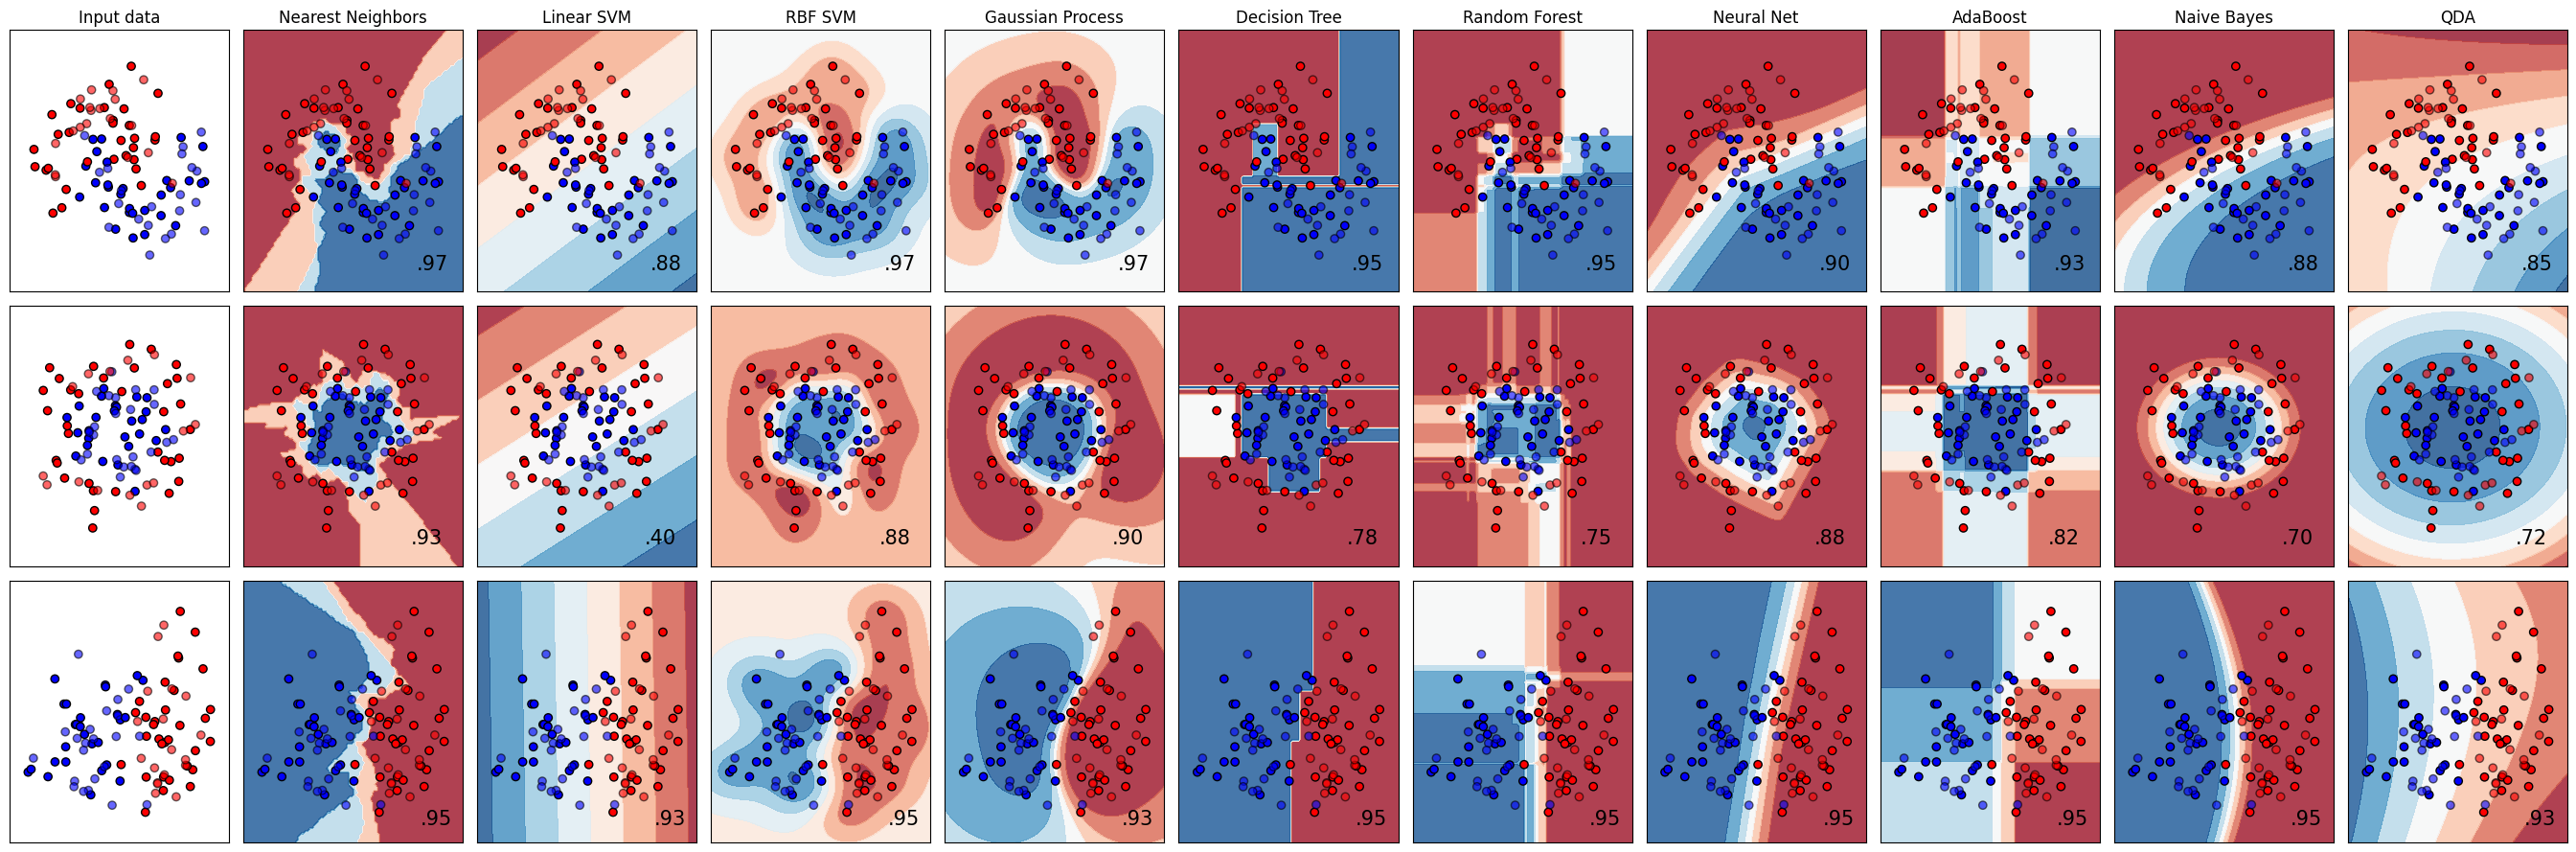

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",                    #Метод k-ближайших соседей
    "Linear SVM",                           #Линейный метод опорных векторов
    "RBF SVM",
    "Gaussian Process",                     #Гауссовский процесс
    "Decision Tree",                        #Дерево решений
    "Random Forest",                        #Случайный лес
    "Neural Net",                           #Нейронная сеть
    "AdaBoost",                             #Адаптивный Бустинг
    "Naive Bayes",                          #Наивный байесовский классификатор
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# итерация по наборам данных
for ds_cnt, ds in enumerate(datasets):
    # предварительная обработка набора данных, разделение на обучающую и тестовую части
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # сначала строим график набора данных
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # строим график точек обучающего набора
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # строим график точек тестируемого набора
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # перебор классификаторов
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # строим график точек обучающего набора
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        
        # строим график точек тестируемого набора
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

#### Алгоритмы кластеризации

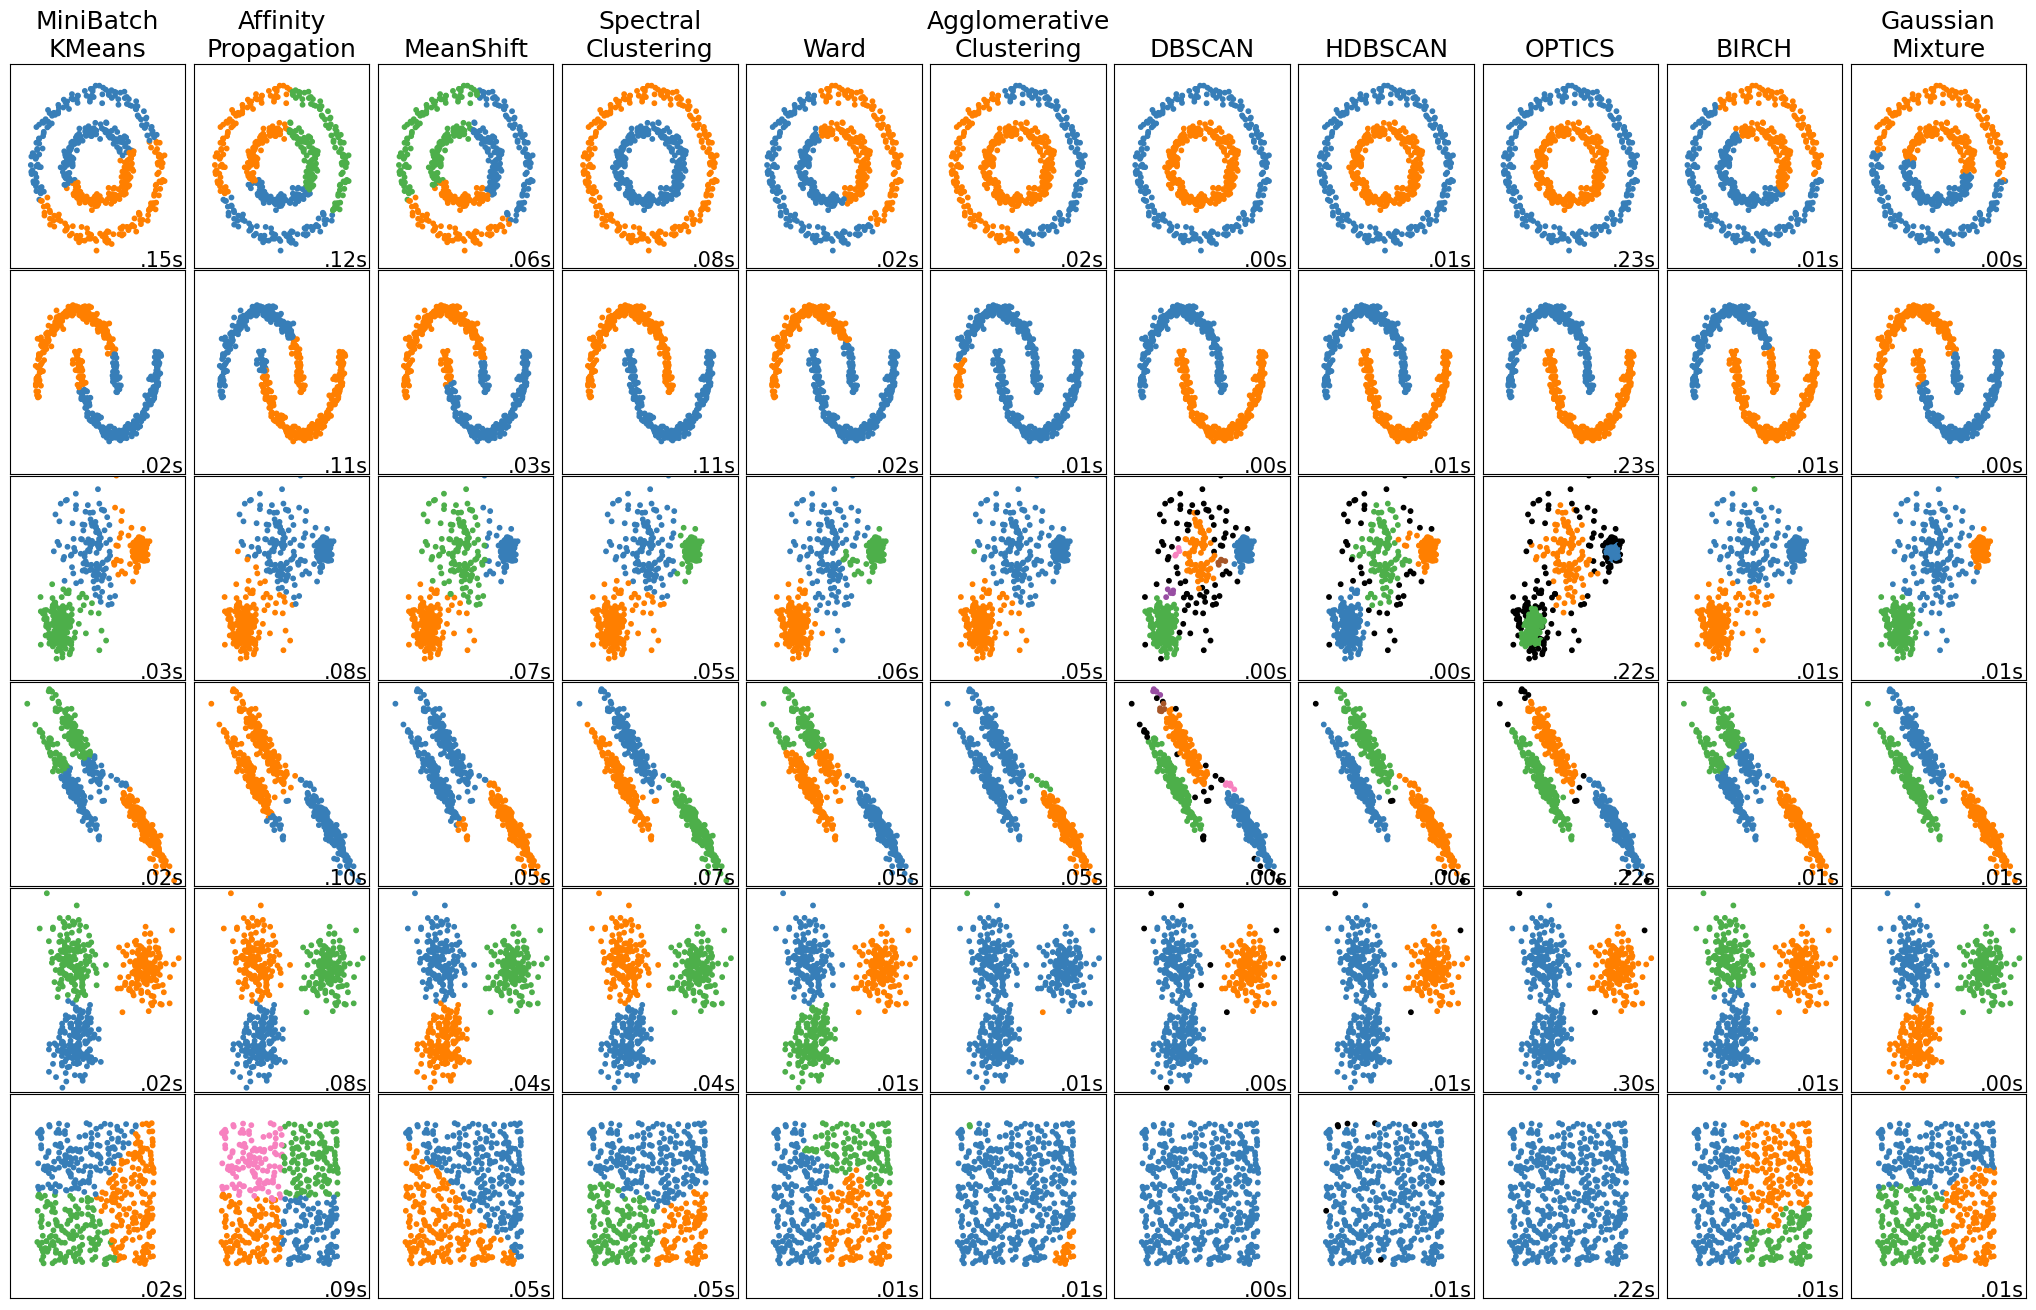

In [3]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Генерируем наборы данных. Мы выбираем достаточно большой размер, чтобы увидеть масштабируемость
# алгоритмов, но не слишком большой, чтобы избежать слишком долгого времени работы.
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# параметры кластеризации
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # обновляем параметры со значениями, характерными для конкретного набора данных
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # нормализуем набор данных для облегчения выбора параметров
    X = StandardScaler().fit_transform(X)

    # оценка полосы пропускания для среднего сдвига
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # матрица связности для структурированного Ворда
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    
    # делаем соединение симметричным
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # созздание объектов кластера
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        n_init="auto",
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation), # Распространение сходства 
        ("MeanShift", ms),                               # Сдвиг среднего значения
        ("Spectral\nClustering", spectral),              # Спектральная кластеризация
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # ловим предупреждения, связанные с kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # добавляем черный цвет для выбросов (если таковые имеются)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### Задание 3 (k-ближайших соседей)

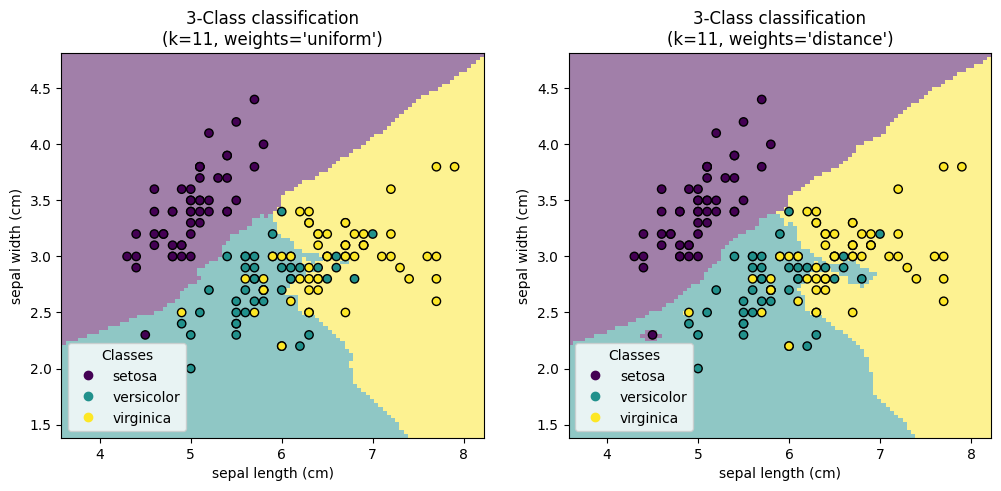

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

### Задание 4 (Случайный лес)

RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333


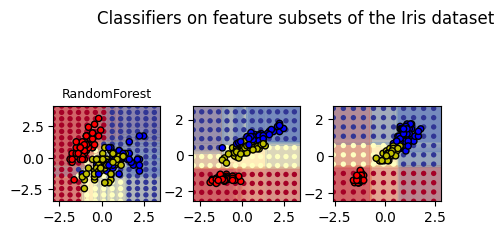

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # ширина шага для контуров поверхности принятия решений
plot_step_coarser = 0.5  # ширина шага для грубых предположений классификатора
RANDOM_SEED = 13  # фиксировать seed на каждой итерации

iris = load_iris()

plot_idx = 1

models = [
    RandomForestClassifier(n_estimators=n_estimators),
]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # берем только две соответствующие характеристики
        X = iris.data[:, pair]
        y = iris.target

        # перемешиваем
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # создаём заголовок для каждого столбца и консоли, используя str() и
        # отрезая бесполезные части строки
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # добавляем заголовок в верхней части каждого столбца
            plt.title(model_title, fontsize=9)

        # строим границу принятия решения, используя мелкую сетку в качестве входных данных для
        # заполненный контурный график
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # изображаем либо один классификатор DecisionTreeClassifier, либо альфа-смешение
        # поверхности решений ансамбля классификаторов
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # выбераем альфа-уровень смешивания относительно числа оценок
            # которые используются (следует отметить, что AdaBoost может использовать меньше оценок
            # чем максимальное, если он достигает достаточно хорошего соответствия на ранних этапах)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Строим более грубую сетку для построения набора классификаций ансамбля
        # чтобы показать, как они отличаются от того, что мы видим на поверхности решений
        # поверхности. Эти точки имеют регулярное пространство и не имеют
        # черного контура
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # намечаем точки обучения, они сгруппированы вместе и имеют
        # черный контур
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

### Задание 5 (Классификация набора машинами опорных векторов/SVM)

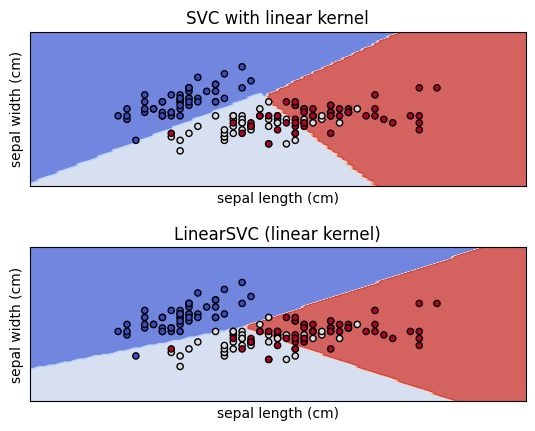

In [6]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Берём первые два признака. Мы можем избежать этого, используя двумерный набор данных
X = iris.data[:, :2]
y = iris.target

# создаем экземпляр SVM и подгоняем данные. Не масштабируем наши
# данные, поскольку мы хотим построить график векторов поддержки
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
)

# ставим сетку 2x2 для построения графика.
fig, sub = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Задание 6 (k-средних)

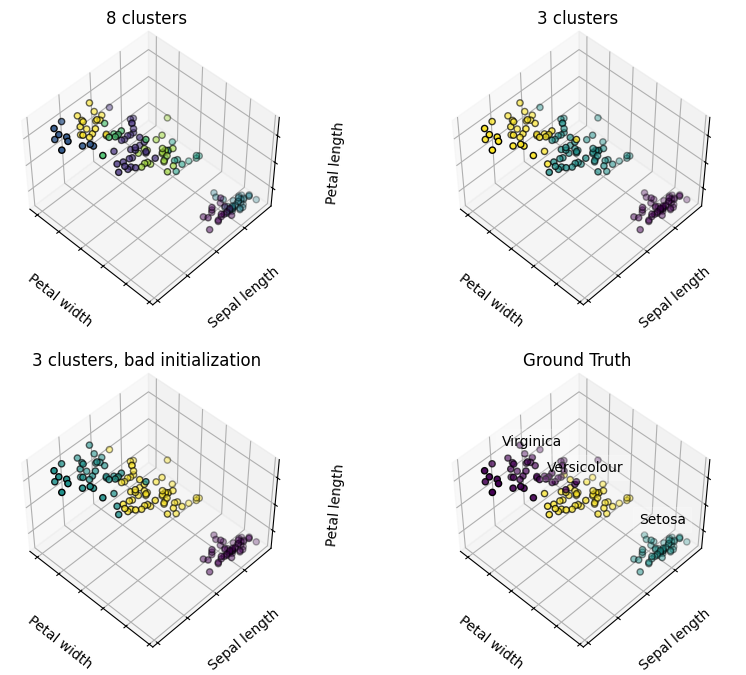

In [7]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8, n_init="auto")),
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

### Задание 7 (Кластеризация методом Уорда)

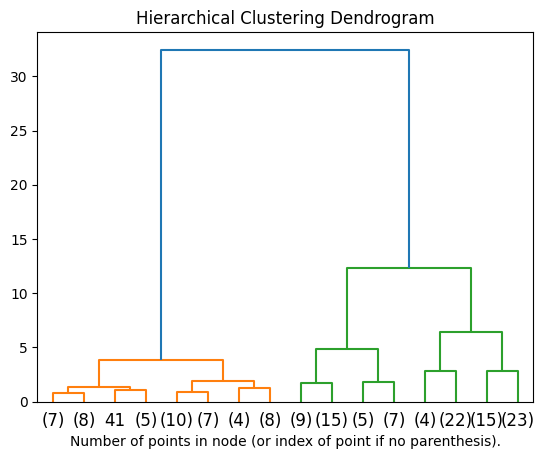

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Задание 8 (Спектральная кластеризация)

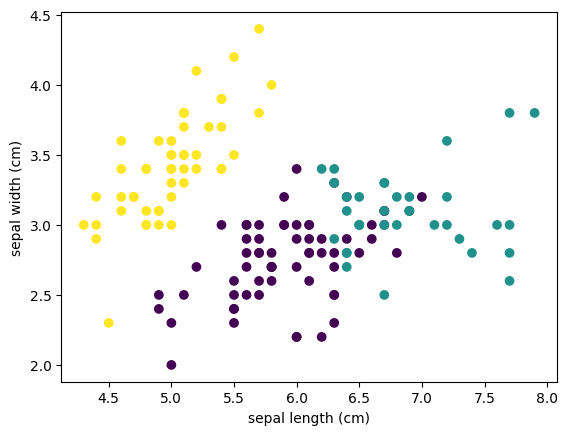

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering

iris = datasets.load_iris()
X = iris.data
y = iris.target

sc = SpectralClustering(n_clusters=3)
sc.fit(X)

# предсказываем метки кластеров
labels = sc.labels_

_, ax = plt.subplots()
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
# график точек данных, окрашенных в цвета предсказанных меток кластеров
plt.scatter(X[:,0], X[:,1], c=labels)

plt.show()

### Задание 9

#### Некоторая сводка 
Набор данных, представленный здесь, содержит 16 259 примеров ложных сигналов, вызванных радиочастотными помехами, и 1 639 примеров реальных пульсаров.
	реальных примеров пульсаров. Все эти примеры были проверены человеческими аннотаторами. Каждый
	кандидат описывается 8 непрерывными переменными. Первые четыре - это простая статистика
	полученные из интегрального профиля импульса (сложенного профиля). Это массив непрерывных
	переменных, которые описывают версию сигнала с разрешением по длине, которая была усреднена
	по времени и частоте (подробнее см. [3]). Остальные четыре переменные
	аналогично получены из кривой DM-SNR (подробнее см. в [3]). Они 
	кратко описаны ниже:
	
	1. Среднее значение интегрального профиля. (Mean of the integrated profile)
	2. Стандартное отклонение интегрированного профиля. (Standard Deviation of the integrated profile)
	3. Избыточный эксцесс интегрального профиля. (Excess kurtosis of the integrated profile)
	4. Перекос интегрального профиля. (Skewness of the integrated profile)
	5. Среднее значение кривой DM-SNR. (Mean of the DM-SNR curve)
	6. Стандартное отклонение кривой DM-SNR. (Standard Deviation of the DM-SNR curve)
	7. Избыточный эксцесс кривой DM-SNR. (Excess kurtosis of the DM-SNR curve)
	8. Перекос кривой DM-SNR. (Skewness of the DM-SNR curve)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

original_data = pd.read_csv("./HTRU_2.csv")
data = original_data.copy()

cols = [
    "Среднее значение интегрального профиля",
    "Стандартное отклонение интегрированного профиля",
    "Избыточный эксцесс интегрального профиля",
    "Перекос интегрального профиля",
    "Среднее значение кривой DM-SNR",
    "Стандартное отклонение кривой DM-SNR",
    "Избыточный эксцесс кривой DM-SNR",
    "Перекос кривой DM-SNR",
    "Class",
]

data.columns = cols

# удаляем целевую переменную
y_data = data["Class"]
X_data = data.drop("Class", axis=1)

X_data

Среднее значение интегрального профиля  \
0                                  102.507812   
1                                  103.015625   
2                                  136.750000   
3                                   88.726562   
4                                   93.570312   
...                                       ...   
17892                              136.429688   
17893                              122.554688   
17894                              119.335938   
17895                              114.507812   
17896                               57.062500   

       Стандартное отклонение интегрированного профиля  \
0                                            58.882430   
1                                            39.341649   
2                                            57.178449   
3                                            40.672225   
4                                            46.698114   
...                                                ...   
17892                                        59.847421   
17893                                        49.485605   
17894                                        59.935939   
17895                                        53.902400   
17896                                        85.797340   

       Избыточный эксцесс интегрального профиля  \
0                                      0.465318   
1                                      0.323328   
2                                     -0.068415   
3                                      0.600866   
4                                      0.531905   
...                                         ...   
17892                                 -0.187846   
17893                                  0.127978   
17894                                  0.159363   
17895                                  0.201161   
17896                                  1.406391   

       Перекос интегрального профиля  Среднее значение кривой DM-SNR  \
0                          -0.515088                        1.677258   
1                           1.051164                        3.121237   
2                          -0.636238                        3.642977   
3                           1.123492                        1.178930   
4                           0.416721                        1.636288   
...                              ...                             ...   
17892                      -0.738123                        1.296823   
17893                       0.323061                       16.409699   
17894                      -0.743025                       21.430602   
17895                      -0.024789                        1.946488   
17896                       0.089520                      188.306020   

       Стандартное отклонение кривой DM-SNR  Избыточный эксцесс кривой DM-SNR  \
0                                 14.860146                         10.576487   
1                                 21.744669                          7.735822   
2                                 20.959280                          6.896499   
3                                 11.468720                         14.269573   
4                                 14.545074                         10.621748   
...                                     ...                               ...   
17892                             12.166062                         15.450260   
17893                             44.626893                          2.945244   
17894                             58.872000                          2.499517   
17895                             13.381731                         10.007967   
17896                             64.712562                         -1.597527   

       Перекос кривой DM-SNR  
0                 127.393580  
1                  63.171909  
2                  53.593661  
3                 252.567306  
4                 131.394004  
...                      ...  
17892             285.931022  
17893               8.

#### Средние значения и стандартные отклонения по каждому столбцу

C:\Users\Alex\AppData\Local\Temp\ipykernel_19628\1627867117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_data[col], kde=False)


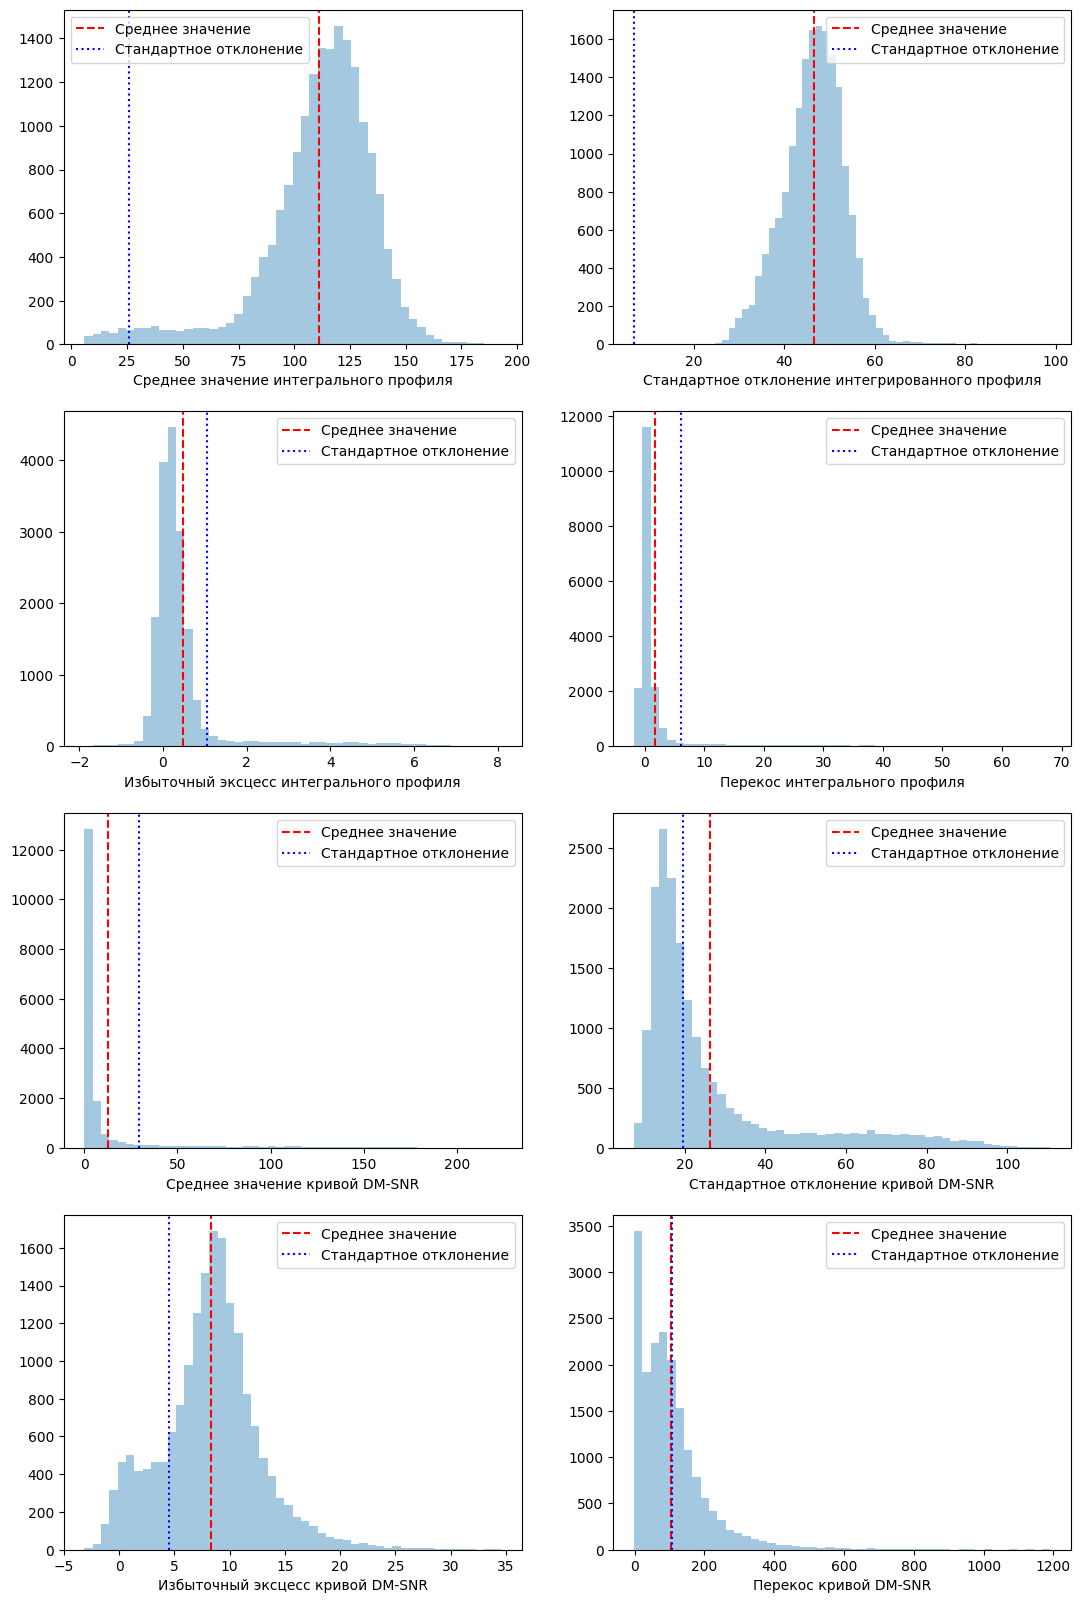

In [11]:
# Гистограммы для просмотра распределения данных
plt.figure(figsize=(13, 20))
for i, col in enumerate(X_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.distplot(X_data[col], kde=False)
    plt.axvline(X_data[col].mean(), color="r", linestyle="dashed", label="Среднее значение")
    plt.axvline(
        X_data[col].std(), color="b", linestyle="dotted", label="Стандартное отклонение"
    )
    plt.legend(loc="best")

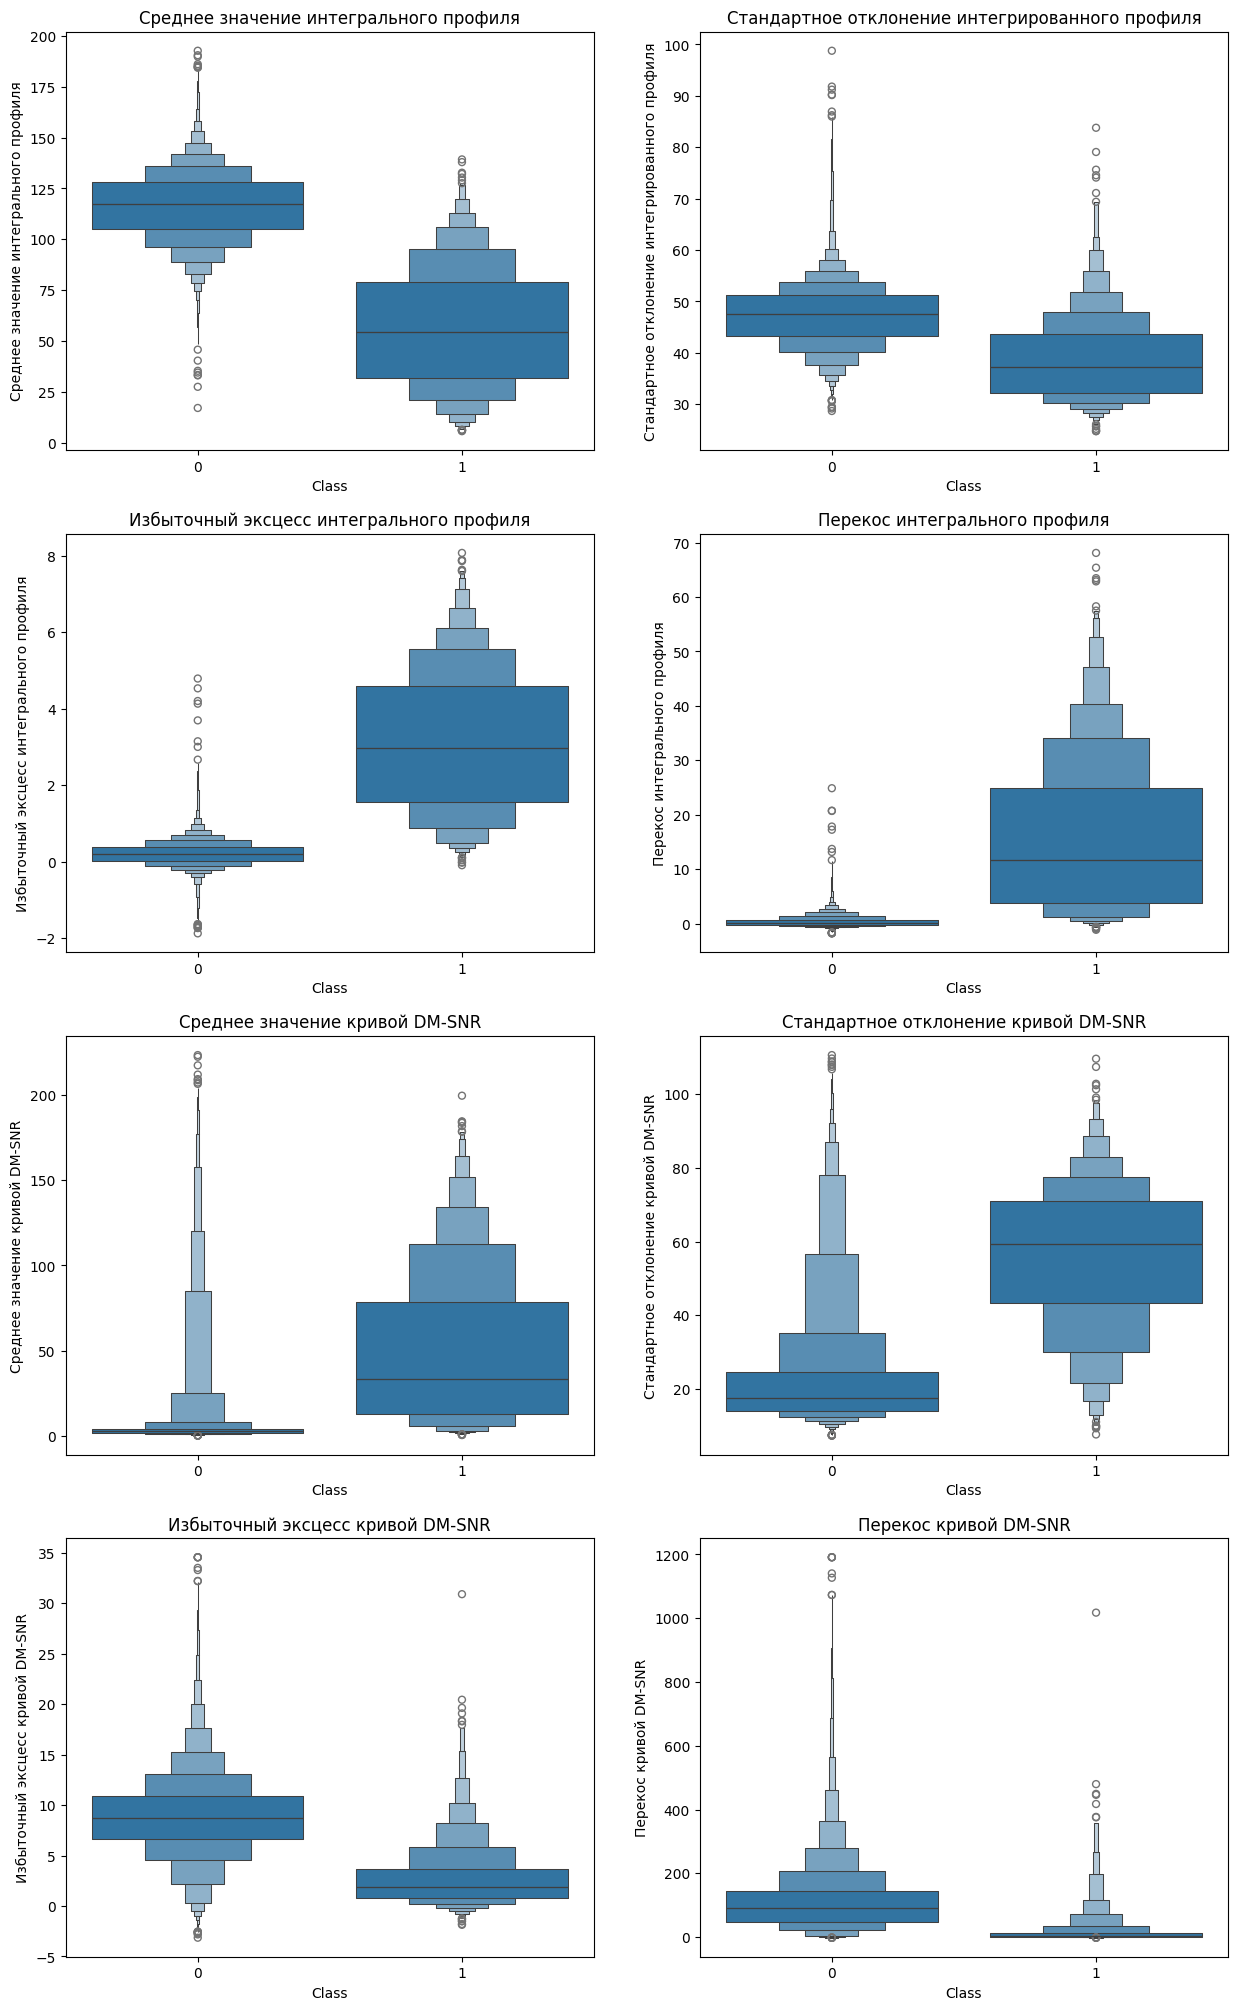

In [12]:
# Визуальное представление статистической сводки данных
# Boxenplot показывает большое количество квантилей
plt.figure(figsize=(15, 25))
for i, col in enumerate(X_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.boxenplot(x=y_data, y=X_data[col])
    plt.title(col)

Поиск кластеров в высокоразмерном пространстве (даже если наш набор данных содержит "всего" 8 признаков) может потребовать большого количества данных для обучения модели.

Кроме того, в многомерном пространстве сложно мыслить и невозможно визуализировать. Концепция евклидова расстояния становится менее полезной с увеличением числа измерений, поскольку расстояние между любыми двумя точками данных сходится.

Эта проблема известна как "проклятие размерности".

И анализ главных компонент (PCA), и кластеризация стремятся упростить данные, но их механизмы различны:

PCA: находит низкоразмерное представление данных, которое объясняет достаточную часть дисперсии.
Кластеризация: находит однородные подгруппы среди данных.

[0.5161509  0.26843666 0.10158157 0.05721447 0.03206632 0.01999274
 0.00253838 0.00201897]


Text(0.5, 1.0, 'Pulsars Dataset - Explained Variance')

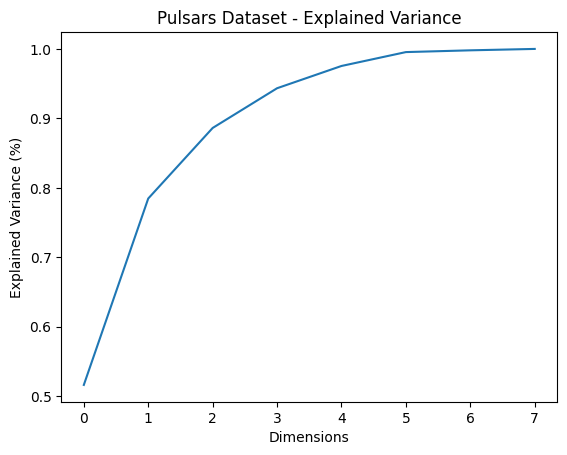

In [13]:
# разделяем набор данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=0
)

# применяем StandardScaler к обучающему набору
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_data.columns)

# преобразуем тестовый набор
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_data.columns)

# применяем PCA к обоим наборам данных
X_for_pca = pd.concat([X_train, X_test], ignore_index=True)

# Principal Component Analysis с использованием 8 измерений (признаков) набора данных
pca = PCA(n_components=8)
X_reduced = pca.fit_transform(X_for_pca)

# We can now retrieve the important information
print(pca.explained_variance_ratio_)

# Построение графика суммирования объясненной дисперсии
plt.figure()
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance (%)")
plt.title("Pulsars Dataset - Explained Variance")

In [14]:
# создаём уменьшенный двумерный набор данных
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(
    pca.fit_transform(X_for_pca),
    columns=["Главная компонента 1", "Главная компонента 2"],
)

X_reduced.head()

Главная компонента 1  Главная компонента 2
0             -0.047451             -2.313865
1             -0.275857             -1.019571
2              0.333196             -0.586007
3              6.638670              1.851893
4              0.115171              0.608944

Проверим методом локтя оптимальное число кластеров

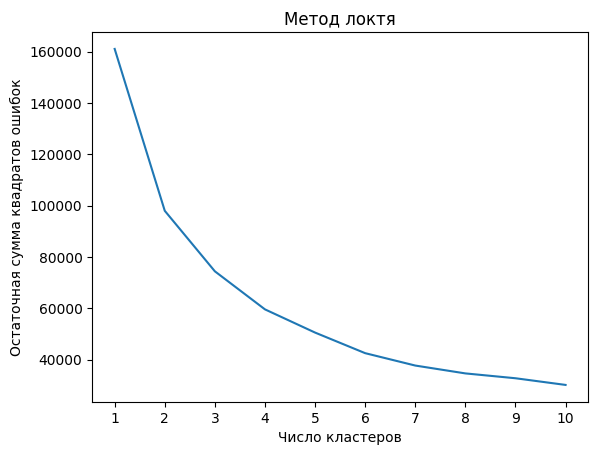

In [15]:
from scipy.io import arff

data = arff.loadarff('HTRU_2.arff')
df = pd.DataFrame(data[0])
df.head()

# отбрасываем строки со значениями NA в любых столбцах
df = df.dropna()

# создаём масштабированный DataFrame, в котором каждая переменная имеет среднее значение 0 и стандартное отклонение 1
scaled_df = StandardScaler().fit_transform(df)

#инициализируем параметры для k-means
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

# создаём список для хранения значений SSE для каждого k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# визуализация результатов
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Число кластеров")
plt.ylabel("Остаточная сумма квадратов ошибок")
plt.title("Метод локтя")
plt.show()

D:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Кластеризация по методу K-средних с данными, уменьшенными с помощью PCA')

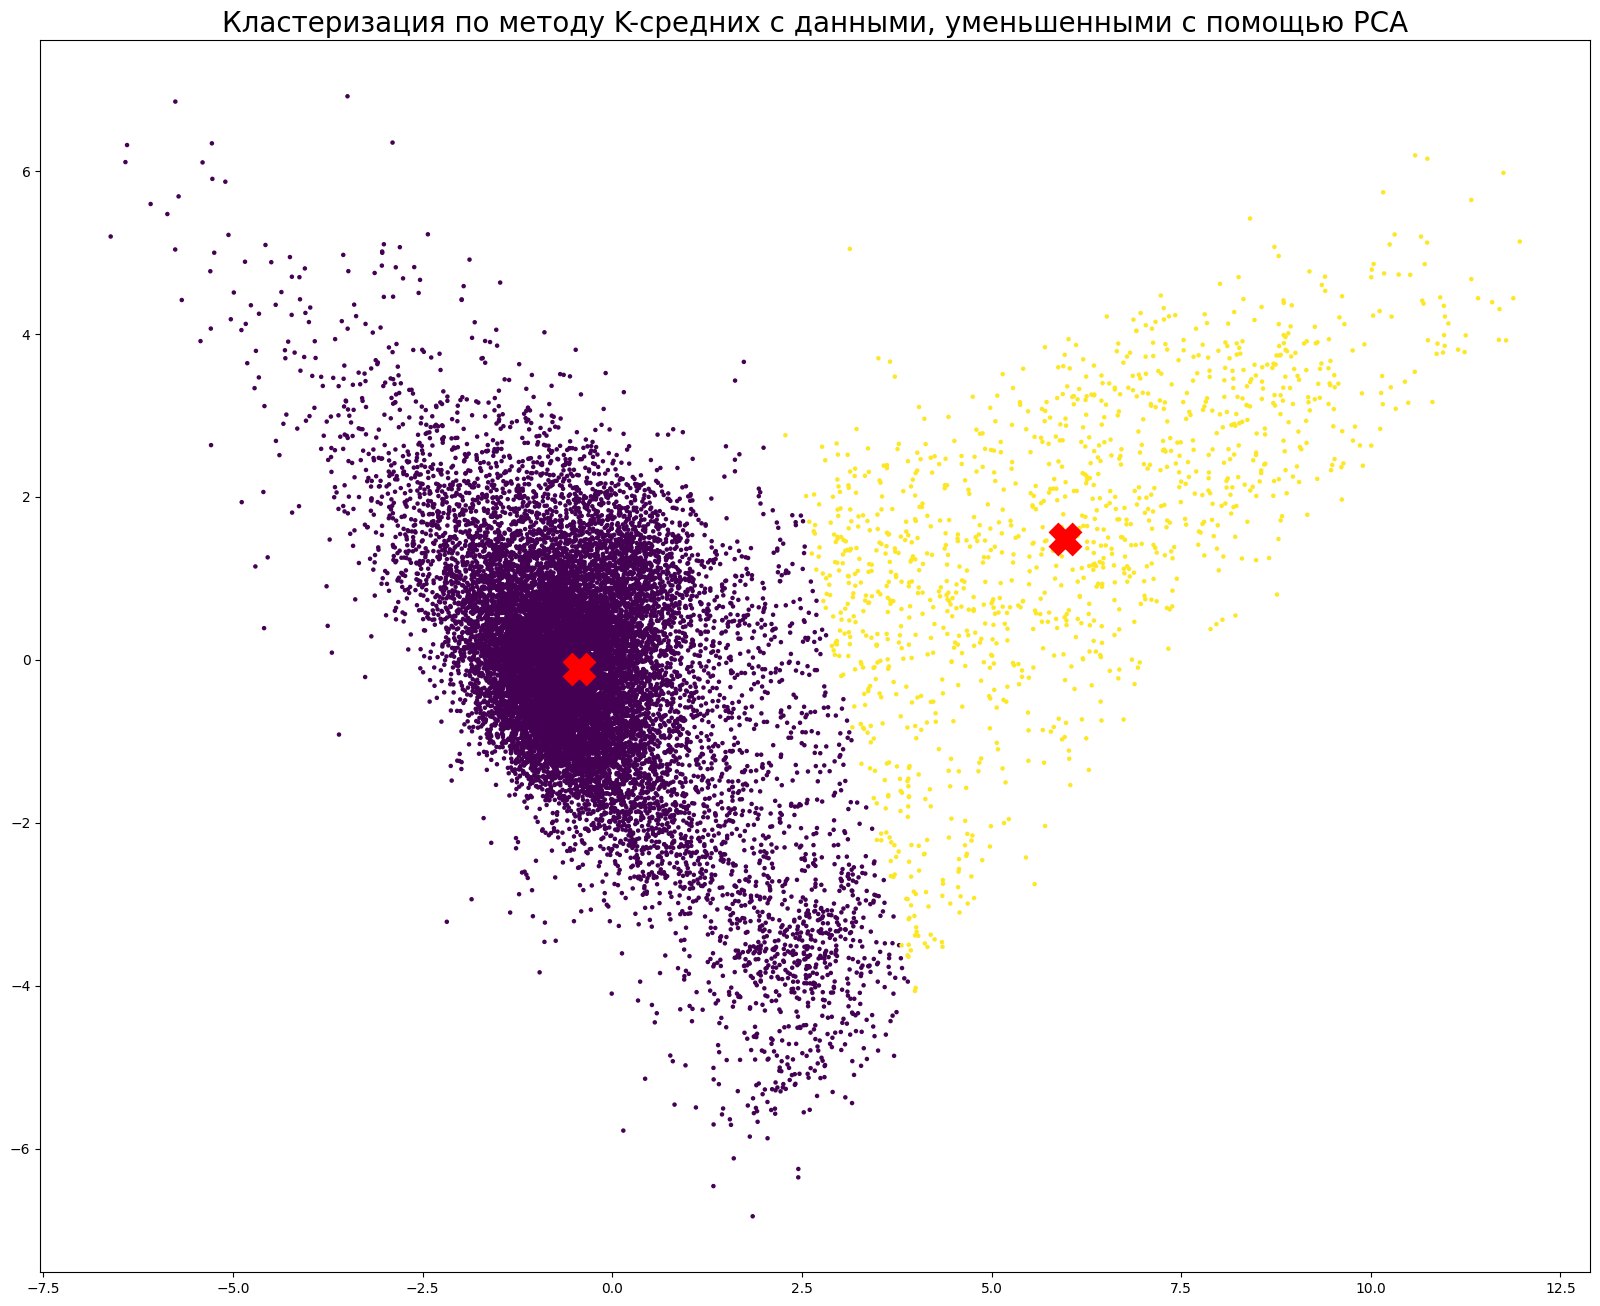

In [16]:
# создаём уменьшенный двумерный набор данных
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(
    pca.fit_transform(X_for_pca),
    columns=["Главная компонента 1", "Главная компонента 2"],
)

# используем алгоритм SKLearn на наборе данных
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_reduced)
clusters = kmeans.predict(X_reduced)

# определяем центры кластеров
centers_pulsars = kmeans.cluster_centers_

def plot_clusters(X, clusters=None, centers=None):
    # добавляем точки на график
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=5, cmap="viridis")

    # Plot the centers if they are identified
    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=300, linewidths=10, color="r"
        )


# преобразование в массив NumPy для построения графиков
X_plot = np.array(X_reduced)

# изображение результатов кластеризации k-means
plt.figure(figsize=[20, 16])
plot_clusters(X_plot, clusters=clusters, centers=centers_pulsars)
plt.title("Кластеризация по методу K-средних с данными, уменьшенными с помощью PCA", fontsize=20)